<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de regresión con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Ezequiel Ortega</font><br>
<font size=3>Semana 3: Ajuste de modelos de Deep Learning</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [California Housing Dataset](#section2)
* [Establecer una función de coste adecuada a nuestro problema](#section3)
* [Overfitting sobre un pequeño conjunto de datos](#section4)
    - [Ejercicio 1](section4.1)
    - [Ejercicio 2](section4.2)
    - [Ejercicio 3](section4.3)
    - [Ejercicio 4](section4.4)
    - [Ejercicio 5](section4.5)
* [Elegimos un Optimizer](#section5)
    - [Ejercicio 6](section5.1)
    - [Ejercicio 7](section5.2)
    - [Ejercicio 8](section5.3)
* [Probar diferentes configuraciones con un número pequeño de epochs](#section6)
    - [Ejercicio 9](section6.1)
    - [Ejercicio 10](section6.2)
* [Ajuste refinado de los parámetros con más epochs](#section7)
    - [Ejercicio 11](section7.1)
    - [Ejercicio 12](section7.2)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la última actividad realizada en la semana anterior. En la actividad de la semana anterior encontramos la mejor arquitectura para los datos que tenemos y ahora vmoas a realizar más experimentos jugando con los optimizers y el valor del learning rate.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (California Housing Dataset) y desde 0 intentar llegar conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendrmeos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional son los últimos ejercicios donde tendréis que sacar una conclusión de si la red que habéis llegado a conseguir tiene un buen rendimiento.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset California Housing con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección.

# <font color="#004D7F" size=5>California Housing Dataset</font>
En este notebook vamos a usar un dataset nuevo, el dataset es muy parecido al dataset del precio de las casas de boston. Esta vez vamos a utilizar un conjunto de datos que contienen información sobre el precio de las casas encontradas en un distrito de California. Las columnas son las siguientes:

- _longitude_: cuanto de al oeste está una casa; un valor más alto está más al oeste.
- _latitude_: cuanto de al norte está una casa; un valor más alto está más al norte.
- _housing_median_age_: edad media de una casa; un valor bajo es una casa más nueva.
- _total_rooms_: número total de habitaciones.
- _total_bedrooms_: número total de dormitorios.
- _population_: número total de personas que residen.
- _households_: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda.
- _median_income_: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares).
- _ocean_proximity_: ubicación de la casa cerca del océano o mar.
- _median_house_value (**variables a predecir**)_: valor medio de la vivienda (medido en dólares).

Vamos a cargar los datos desde el fichero `housing.csv`:

In [ ]:
df = pd.read_csv('housing (1).csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [ ]:
df.shape

(20433, 10)

Vamos a separar la variable objetivo del resto de variables (accedemos al campo value para que los datos sean de tipo _numpy array_ y se puedan usar como variable de entrada de nuestra red):

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [ ]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

## 1. Establecer una función de coste adecuada a nuestro problema.

En este caso, como es un problema de regresión y los valores de nuestros datos son tan grandes, elegimos la función de coste `mean_absolute_percentage_error`, este error varía entre los valores 100 y 0 donde 100 es el pero error que podemos llegar a tener y 0 es el mejor error, por lo que en nuestros entrenamientos buscaremos un error más cercano a 0.

In [ ]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting sobre un pequeño conjunto de datos.

Ahora, como ya hemos visto en clase vamos a encontrar una estructura de red que encaje con los datos que vamos a utilizar. Vamos a crear varias redes a ver que talfuncionan.

Para hacer entrenamientos rápidos y ver si la red se adapta a los datos vamos a usar solo un subconjunto de los datos, es decir usaremos 1000 datos y no usaremos conjunto de validación.

### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Tomar un subconjunto de 1000 datos
subset_size = 1000
indices_subset = np.random.choice(len(x), subset_size, replace=False)
x_subset = x[indices_subset]
y_subset = y[indices_subset]

# Construir el modelo
model = Sequential()
model.add(Dense(8, input_dim=x_subset.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss= actual_loss, optimizer=optimizer)

# Entrenar el modelo
epochs = 30
model.fit(x_subset, y_subset, epochs=epochs)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.8437
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 99.7021
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 99.4762
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 99.0416
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 98.4015
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 97.5136
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 96.2847
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 94.5562
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 92.1419
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 89.0387
Epoch 11/30
32/32 [==============================] - 0s 2ms/step - loss: 85.3326
Epoch 12/30
32/32 [==============================] - 0s 2ms/step - loss: 81.0744
Epoch 13/30
32/32 [==================

### <font color="#004D7F" size=4>Ejercicio 2</font>

Vamos a complicar un poco más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Tomar un subconjunto de 1000 datos
subset_size = 1000
indices_subset = np.random.choice(len(x), subset_size, replace=False)
x_subset = x[indices_subset]
y_subset = y[indices_subset]

# Construir el modelo con la nueva arquitectura
model = Sequential()
model.add(Dense(64, input_dim=x_subset.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo
epochs = 30
model.fit(x_subset, y_subset, epochs=epochs)

Epoch 1/30
32/32 [==============================] - 1s 4ms/step - loss: 99.2518
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 93.0832
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 64.2039
Epoch 4/30
32/32 [==============================] - 0s 6ms/step - loss: 55.6873
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 55.0845
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 55.1895
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 54.7776
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 54.6806
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 53.8821
Epoch 10/30
32/32 [==============================] - 0s 9ms/step - loss: 53.4216
Epoch 11/30
32/32 [==============================] - 0s 13ms/step - loss: 53.1216
Epoch 12/30
32/32 [==============================] - 0s 4ms/step - loss: 52.4600
Epoch 13/30
32/32 [=================

### <font color="#004D7F" size=4>Ejercicio 3</font>

Vamos a complicar aun más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *6º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Tomar un subconjunto de 1000 datos
subset_size = 1000
indices_subset = np.random.choice(len(x), subset_size, replace=False)
x_subset = x[indices_subset]
y_subset = y[indices_subset]

# Construir el modelo con la nueva arquitectura
model = Sequential()
model.add(Dense(128, input_dim=x_subset.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo
epochs = 30
model.fit(x_subset, y_subset, epochs=epochs)

Epoch 1/30
32/32 [==============================] - 1s 3ms/step - loss: 99.8050
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 97.4761
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 81.8240
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 59.1561
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 57.1334
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 56.7350
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 56.5320
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 56.2499
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 55.8287
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 55.3178
Epoch 11/30
32/32 [==============================] - 0s 3ms/step - loss: 54.9968
Epoch 12/30
32/32 [==============================] - 0s 3ms/step - loss: 54.4631
Epoch 13/30
32/32 [==================

### <font color="#004D7F" size=4>Ejercicio 4</font>

Vamos a hacer una última red con más capas y neuronas:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 1024 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 512 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 256 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *6º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *7º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *8º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *9º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Tomar un subconjunto de 1000 datos
subset_size = 1000
indices_subset = np.random.choice(len(x), subset_size, replace=False)
x_subset = x[indices_subset]
y_subset = y[indices_subset]

# Construir el modelo con la nueva arquitectura
model = Sequential()
model.add(Dense(1024, input_dim=x_subset.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo
epochs = 30
model.fit(x_subset, y_subset, epochs=epochs)

Epoch 1/30
32/32 [==============================] - 2s 19ms/step - loss: 82.5058
Epoch 2/30
32/32 [==============================] - 0s 15ms/step - loss: 56.7441
Epoch 3/30
32/32 [==============================] - 0s 15ms/step - loss: 55.3522
Epoch 4/30
32/32 [==============================] - 0s 14ms/step - loss: 54.8526
Epoch 5/30
32/32 [==============================] - 0s 14ms/step - loss: 51.9770
Epoch 6/30
32/32 [==============================] - 0s 14ms/step - loss: 50.0517
Epoch 7/30
32/32 [==============================] - 0s 14ms/step - loss: 47.2713
Epoch 8/30
32/32 [==============================] - 1s 16ms/step - loss: 44.5670
Epoch 9/30
32/32 [==============================] - 1s 19ms/step - loss: 44.3363
Epoch 10/30
32/32 [==============================] - 1s 16ms/step - loss: 43.8656
Epoch 11/30
32/32 [==============================] - 0s 13ms/step - loss: 45.5851
Epoch 12/30
32/32 [==============================] - 1s 18ms/step - loss: 42.9024
Epoch 13/30
32/32 [======

### <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada una de las arquitecturas definidas y quédate con la mejor. **¿En qué experimento se obtiene los mejores resultados?**

La arquitectura elegida la usaremos en el caso práctico para seguir ajustando nuestro modelo y alcanzar un buen rendimiento.

La arquitectura que mejor resultado nos arroja sería la última de 9 capas con un valor de pérdida de 41,77 siendo el más bajo de todo. La usaremos para seguir ajustando nuestro modelo.

## 3. Elegimos un Optimizer.

Hemos establecido Adam en los entrenamientos anteriores. Vamos a comprobarlo para el conjunto de validación como funciona y después probaremos a usar un optimizador SGD.

### <font color="#004D7F" size=4>Ejercicio 6</font>

Usa la mejor arquitectura y configuración de entrenamiento de los ejercicios anteriores y entrena con la siguiente configuración:

- Usa un `validation_split` de 0.2
- Utiliza todos los datos y no solo 1000.
- Usa 5 epochs en total.

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=x.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo con validation_split
epochs = 5
model.fit(x, y, epochs=epochs, validation_split=0.2)

Epoch 1/5
511/511 [==============================] - 12s 21ms/step - loss: 46.7261 - val_loss: 46.0639
Epoch 2/5
511/511 [==============================] - 9s 18ms/step - loss: 40.1803 - val_loss: 41.4132
Epoch 3/5
511/511 [==============================] - 9s 18ms/step - loss: 36.5169 - val_loss: 39.7049
Epoch 4/5
511/511 [==============================] - 11s 21ms/step - loss: 35.1936 - val_loss: 36.0480
Epoch 5/5
511/511 [==============================] - 10s 20ms/step - loss: 33.0300 - val_loss: 33.9072


### <font color="#004D7F" size=4>Ejercicio 7</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero usa un optimizador **SGD** en lugar de un Adam.

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=x.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo con el optimizador SGD
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo con validation_split
epochs = 5
model.fit(x, y, epochs=epochs, validation_split=0.2)

Epoch 1/5
511/511 [==============================] - 10s 18ms/step - loss: 99.9796 - val_loss: 99.9601
Epoch 2/5
511/511 [==============================] - 8s 16ms/step - loss: 99.8868 - val_loss: 99.7409
Epoch 3/5
511/511 [==============================] - 9s 18ms/step - loss: 77.8997 - val_loss: 58.1641
Epoch 4/5
511/511 [==============================] - 7s 14ms/step - loss: 56.4879 - val_loss: 56.3109
Epoch 5/5
511/511 [==============================] - 9s 17ms/step - loss: 55.6773 - val_loss: 58.0739


### <font color="#004D7F" size=4>Ejercicio 8</font>

**¿Qué optimizador ha funcionado mejor?**

El optimizador que eligas tendrás que usarlo en los siguientes ejercicios.

El optimizador que mejor nos funciona es el Adam con más de un 20% menos de valor de pérdida.

## 4. Probar diferentes configuraciones con un número pequeño de epochs.

Vamos a realizar diferentes experimentos cambiando el learning rate de nuestro optimizador.

### <font color="#004D7F" size=4>Ejercicio 9</font>

Realiza un entrenamiento con la arquitectura y el optimizador que mejor te ha funcionado y utilizar un **learning rate de 0.1**.

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=x.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo con el optimizador Adam y learning rate de 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo con validation_split
epochs = 5
model.fit(x, y, epochs=epochs, validation_split=0.2)

Epoch 1/5
511/511 [==============================] - 13s 23ms/step - loss: 109.7063 - val_loss: 99.9684
Epoch 2/5
511/511 [==============================] - 9s 18ms/step - loss: 99.9486 - val_loss: 99.9361
Epoch 3/5
511/511 [==============================] - 10s 19ms/step - loss: 99.9141 - val_loss: 99.9041
Epoch 4/5
511/511 [==============================] - 10s 20ms/step - loss: 99.8797 - val_loss: 99.8720
Epoch 5/5
511/511 [==============================] - 8s 16ms/step - loss: 99.8452 - val_loss: 99.8401


### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=x.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo con el optimizador Adam y learning rate de 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo con validation_split
epochs = 5
model.fit(x, y, epochs=epochs, validation_split=0.2)

Epoch 1/5
511/511 [==============================] - 12s 20ms/step - loss: 61.4175 - val_loss: 53.4518
Epoch 2/5
511/511 [==============================] - 11s 21ms/step - loss: 46.0746 - val_loss: 47.5564
Epoch 3/5
511/511 [==============================] - 10s 20ms/step - loss: 41.9281 - val_loss: 47.0762
Epoch 4/5
511/511 [==============================] - 10s 19ms/step - loss: 41.0650 - val_loss: 46.4158
Epoch 5/5
511/511 [==============================] - 11s 21ms/step - loss: 40.4569 - val_loss: 46.1951


## 5. Ajuste refinado de los parámetros con más epochs. [Opcional]

Por último vamos a realizar un entrenamiento más largo para ver hasta donde llega el rendimiento de nuestro modelo.

### <font color="#004D7F" size=4>Ejercicio 11 [Opcional]</font>

**¿Entre los entrenamientos usando learning rates igual a 0.001, 0.1 y 0.0001 cual ha funcionado mejor?**

Con el experimento que mejor haya funcionado haz un entrenamiento usando 30 epochs y ver que tal funciona el entrenamiento con más epochs.

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=x.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))

# Compilar el modelo con el optimizador Adam y learning rate de 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=actual_loss, optimizer=optimizer)

# Entrenar el modelo con validation_split
epochs = 30
model.fit(x, y, epochs=epochs, validation_split=0.2)

Epoch 1/30
511/511 [==============================] - 12s 20ms/step - loss: 64.7519 - val_loss: 54.7289
Epoch 2/30
511/511 [==============================] - 11s 22ms/step - loss: 49.7886 - val_loss: 48.6029
Epoch 3/30
511/511 [==============================] - 10s 20ms/step - loss: 42.9090 - val_loss: 47.8273
Epoch 4/30
511/511 [==============================] - 9s 17ms/step - loss: 41.9548 - val_loss: 47.6296
Epoch 5/30
511/511 [==============================] - 11s 21ms/step - loss: 41.4015 - val_loss: 46.8519
Epoch 6/30
511/511 [==============================] - 11s 22ms/step - loss: 40.8857 - val_loss: 46.4736
Epoch 7/30
511/511 [==============================] - 8s 15ms/step - loss: 40.4472 - val_loss: 45.8318
Epoch 8/30
511/511 [==============================] - 10s 20ms/step - loss: 39.7836 - val_loss: 45.2133
Epoch 9/30
511/511 [==============================] - 11s 21ms/step - loss: 39.2555 - val_loss: 45.0993
Epoch 10/30
511/511 [==============================] - 8s 16ms/ste

### <font color="#004D7F" size=4>Ejercicio 12 [Opcional]</font>

Muestra en una gráfica como ha evolucionado el entrenamiento.

Epoch 1/30
511/511 [==============================] - 9s 17ms/step - loss: 26.8551 - val_loss: 28.9344
Epoch 2/30
511/511 [==============================] - 9s 19ms/step - loss: 26.5508 - val_loss: 28.7182
Epoch 3/30
511/511 [==============================] - 9s 18ms/step - loss: 26.3714 - val_loss: 28.3342
Epoch 4/30
511/511 [==============================] - 9s 18ms/step - loss: 26.3577 - val_loss: 29.7376
Epoch 5/30
511/511 [==============================] - 10s 19ms/step - loss: 26.3607 - val_loss: 34.0331
Epoch 6/30
511/511 [==============================] - 8s 16ms/step - loss: 26.1013 - val_loss: 27.6963
Epoch 7/30
511/511 [==============================] - 11s 21ms/step - loss: 25.8818 - val_loss: 30.8550
Epoch 8/30
511/511 [==============================] - 10s 20ms/step - loss: 25.8401 - val_loss: 30.6173
Epoch 9/30
511/511 [==============================] - 11s 21ms/step - loss: 25.8249 - val_loss: 30.2535
Epoch 10/30
511/511 [==============================] - 10s 20ms/step 

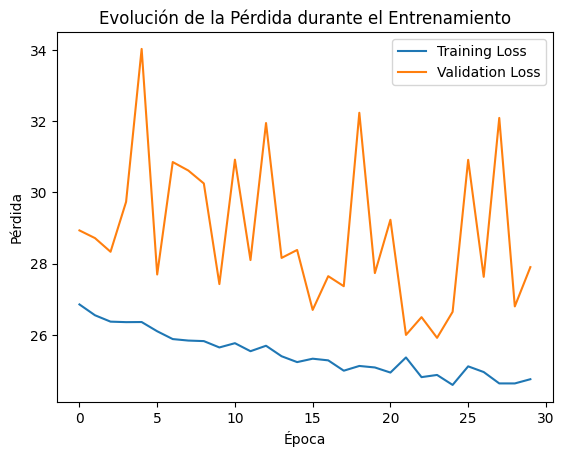

In [ ]:
import matplotlib.pyplot as plt


modelo = model.fit(x, y, epochs=30, validation_split=0.2)

# Mostrar la evolución de la pérdida en el conjunto de entrenamiento y validación
plt.plot(modelo.history['loss'], label='Training Loss')
plt.plot(modelo.history['val_loss'], label='Validation Loss')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
pip install nbconvert pandoc


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33259 sha256=7d014bd6c46ad36d4a1ff0476e129956e4b26ef5090b2b0eea5205100f853cf2
  Stored in directory: /root/.cache/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc
